# Predicting Car Insurance Claims: A Comparative Analysis of Machine Learning Models with Final Chosen Model

As a risk department of an insurance company, our main goal is to ensure the stability of our cashflows and minimize the risk of losses. To achieve this, we are using a dataset with insurance data for cars to build a model that predicts whether a claim will be made in the first 6 months of insurance.

By predicting the likelihood of a claim, we can take proactive measures to mitigate the risk and minimize the potential losses. For example, if our model predicts a high likelihood of a claim, we can increase the premium or set a higher deductible to reduce the potential payout. On the other hand, if the model predicts a low likelihood of a claim, we can offer competitive prices to attract more customers while maintaining our profitability.

In this context, the best metric for evaluating the model would be the area under the receiver operating characteristic curve (AUC-ROC). This metric takes into account both the true positive rate (sensitivity) and the false positive rate (1-specificity) of the model, which is important for balancing the cost of false positives (unnecessary increase in premiums) and false negatives (unexpected payouts). A higher AUC-ROC score indicates a better performing model that can help us make more accurate predictions and manage the risk effectively.

## Exploratory Data Analysis

Exploratory Data Analysis (EDA) is an essential step in understanding and gaining insights from our dataset before conducting further analysis and modeling machine learning algorithms. It involves examining and visualizing the data to identify patterns, relationships, and anomalies. EDA helps uncover potential problems, validate assumptions, and generate hypotheses. To explore our dataset, we will perform the following steps:

**Data Cleaning**
- Data cleaning is an essential step in the data analysis process as it ensures that the dataset is accurate, consistent, and suitable for analysis. It involves various operations such as handling missing values, removing duplicates, and addressing data inconsistencies or errors. By cleaning the data, potential issues and biases can be identified and resolved, which helps to prevent misleading or inaccurate results. The process of data cleaning improves the overall quality of the dataset, making it more reliable for subsequent analysis and decision-making.


**Univariate Analysis:**
- Univariate analysis is a method that centers on comprehending the distribution, summary statistics, and properties of individual variables in isolation. This analysis entails using visualizations such as histograms, box plots, and descriptive statistics like mean, median, and variance. By performing univariate analysis, one can detect outliers, assess skewness, and observe other patterns within each variable. Ultimately, this approach offers an initial understanding of the characteristics of the variables under examination.


**Bivariate Analysis:**
- Bivariate analysis is a methodology used to examine the relationship between two variables. It enables a deeper understanding of how variables interact or influence each other and helps identify potential associations. This analysis involves employing techniques such as scatter plots, correlation analysis, and cross-tabulations. By conducting bivariate analysis, one gains insights into the dependencies, correlations, or trends that exist between pairs of variables, revealing valuable information about their interrelationship.


**Multivariate Analysis:**
- Multivariate analysis expands the exploration to multiple variables simultaneously, going beyond the examination of individual variables or pairs of variables. It delves into complex relationships and interactions among three or more variables. To conduct multivariate analysis, various techniques can be employed, including heatmaps, parallel coordinate plots, or dimensionality reduction methods like Principal Component Analysis (PCA). Through multivariate analysis, patterns, clusters, or groups of variables that may impact the overall analysis can be identified. This approach allows for a comprehensive understanding of the interdependencies and combined effects of multiple variables in a dataset.

In [223]:
# import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import mutual_info_regression

import warnings
warnings.filterwarnings('ignore')

In [224]:
# read data file
dataset = pd.read_csv('../data/ml_gw_car_insurance.csv')
dataset.head()

,Unnamed: 0,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,...,No,No,No,Yes,No,No,No,Yes,0,0.0
1,1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,...,No,No,No,Yes,No,No,No,Yes,0,0.0
2,2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,...,No,No,No,Yes,No,No,No,Yes,0,0.0
3,3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0.0
4,4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0.0


### Data Cleaning

For cleaning our data we build a function that performs the following tasks:
- Transforming Yes and No values into Booleans:
    - Replaces "No" with 0 and "Yes" with 1.
- Removal of policy_id column:
    - Drops the "policy_id" column from the dataset.
- Only considering rows where target variable is not NaN:
    - Filters the dataset to include only rows where the "is_claim" column has values of 1 or 0.
- Extracting torque and power values:
    - Extracts numeric values from the "max_torque" column and creates new columns for "torque_Nm" and "torque_rpm".
    - Extracts numeric values from the "max_power" column and creates new columns for "power_bhp" and "power_rpm".
- Dropping unnecessary columns:
    - Removes the "max_torque" and "max_power" columns from the dataset.
- Returns the modified dataset after performing the cleaning and transformation steps.

In [225]:
def data_cleaning(dataset):
    
    #Removal of policy_id column
    dataset = dataset.drop(columns = {"policy_id", 'Unnamed: 0'})

    # only considering rows where target variable is not nan
    dataset = dataset[(dataset.is_claim == 1) | (dataset.is_claim == 0)]

    # Prepare torque and power columns
    dataset['torque_Nm'] = dataset['max_torque'].str.extract('(\d+)').astype(float)
    dataset['torque_rpm'] = dataset['max_torque'].str.extract('@(\d+)').astype(float)
    dataset['power_bhp'] = dataset['max_power'].str.extract('(\d+.\d+)').astype(float)
    dataset['power_rpm'] = dataset['max_power'].str.extract('@(\d+)').astype(float)

    dataset.drop(columns = {'max_torque','max_power'}, inplace=True)
    
    return dataset

In [226]:
dataset = data_cleaning(dataset)
dataset.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,engine_type,...,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,torque_Nm,torque_rpm,power_bhp,power_rpm
0,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,F8D Petrol Engine,...,No,No,No,Yes,0,0.0,60.0,3500.0,40.36,6000.0
1,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,F8D Petrol Engine,...,No,No,No,Yes,0,0.0,60.0,3500.0,40.36,6000.0
2,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,F8D Petrol Engine,...,No,No,No,Yes,0,0.0,60.0,3500.0,40.36,6000.0
3,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,1.2 L K12N Dualjet,...,Yes,Yes,Yes,Yes,2,0.0,113.0,4400.0,88.50,6000.0
4,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,1.0 SCe,...,No,Yes,Yes,Yes,2,0.0,91.0,4250.0,67.06,5500.0


In [227]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58592 entries, 0 to 58591
Data columns (total 45 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_tenure                     58592 non-null  float64
 1   age_of_car                        58592 non-null  float64
 2   age_of_policyholder               58592 non-null  float64
 3   area_cluster                      58592 non-null  object 
 4   population_density                58592 non-null  int64  
 5   make                              58592 non-null  int64  
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  object 
 9   engine_type                       58592 non-null  object 
 10  airbags                           58592 non-null  int64  
 11  is_esc                            58592 non-null  object 
 12  is_a

### Univariate Analysis

During the univariate analysis, we performed the following steps:

**Data Type Conversion:**
- This conversion is done to treat these columns as categorical variables during analysis.

**Categorical Variable Analysis:**
- For each categorical variable, a bar plot is generated to visualize the frequency distribution of each category.
- This analysis helps understand the distribution of individual categorical variables.

**Numerical Variable Analysis:**
- For chosen numerical variable, a distribution plot is created to visualize its distribution.
- This analysis provides insights into the distribution patterns of individual numerical variables.

**Target Variable Analysis:**
- For the target variable, a bar plot will be generated to visualize the frequency distribution.
- This analysis helps to understand any imbalance we might have in our dataset. 

In [228]:
# transform columns to type object
dataset['airbags'] = dataset['airbags'].astype('object')
dataset['cylinder'] = dataset['cylinder'].astype('object')
dataset['gear_box'] = dataset['gear_box'].astype('object')
dataset['ncap_rating'] = dataset['ncap_rating'].astype('object')
dataset['torque_Nm'] = dataset['torque_Nm'].astype('object')
dataset['torque_rpm'] = dataset['torque_rpm'].astype('object')
dataset['power_bhp'] = dataset['power_bhp'].astype('object')
dataset['power_rpm'] = dataset['power_rpm'].astype('object')
dataset['turning_radius'] = dataset['turning_radius'].astype('object')
dataset['length'] = dataset['length'].astype('object')
dataset['width'] = dataset['width'].astype('object')
dataset['height'] = dataset['height'].astype('object')
dataset['gross_weight'] = dataset['gross_weight'].astype('object')
dataset['make'] = dataset['make'].astype('object')
dataset['displacement'] = dataset['displacement'].astype('object')

# categorical and numerical variables
cat = dataset.select_dtypes(include=object).columns
num = dataset.select_dtypes(include=np.number).columns

#### Categorical Variables

We're generating bar plots to visualize the frequency distribution of each categorical variable. By analyzing the frequency distribution, we can **identify categorical variables that have imbalanced or skewed distributions**. Imbalanced variables may lead to biased model performance or hinder the learning process of machine learning algorithms. Visualizing the distributions helps in identifying such variables and deciding whether to include, exclude, or handle them differently during the feature selection process.

Furthermore, categorical variables with a large number of unique categories or with categories that **occur infrequently may need to be transformed or grouped to reduce dimensionality and improve model performance**. By visualizing the frequency distribution, we can identify such variables and make informed decisions on how to handle them during feature engineering.

Additionally, they often require encoding or transformation into numerical representations before they can be used as input to machine learning models. Understanding the distribution of categories **helps in deciding the appropriate encoding technique, such as one-hot encoding or ordinal encoding,** to ensure the model can effectively interpret the categorical data.

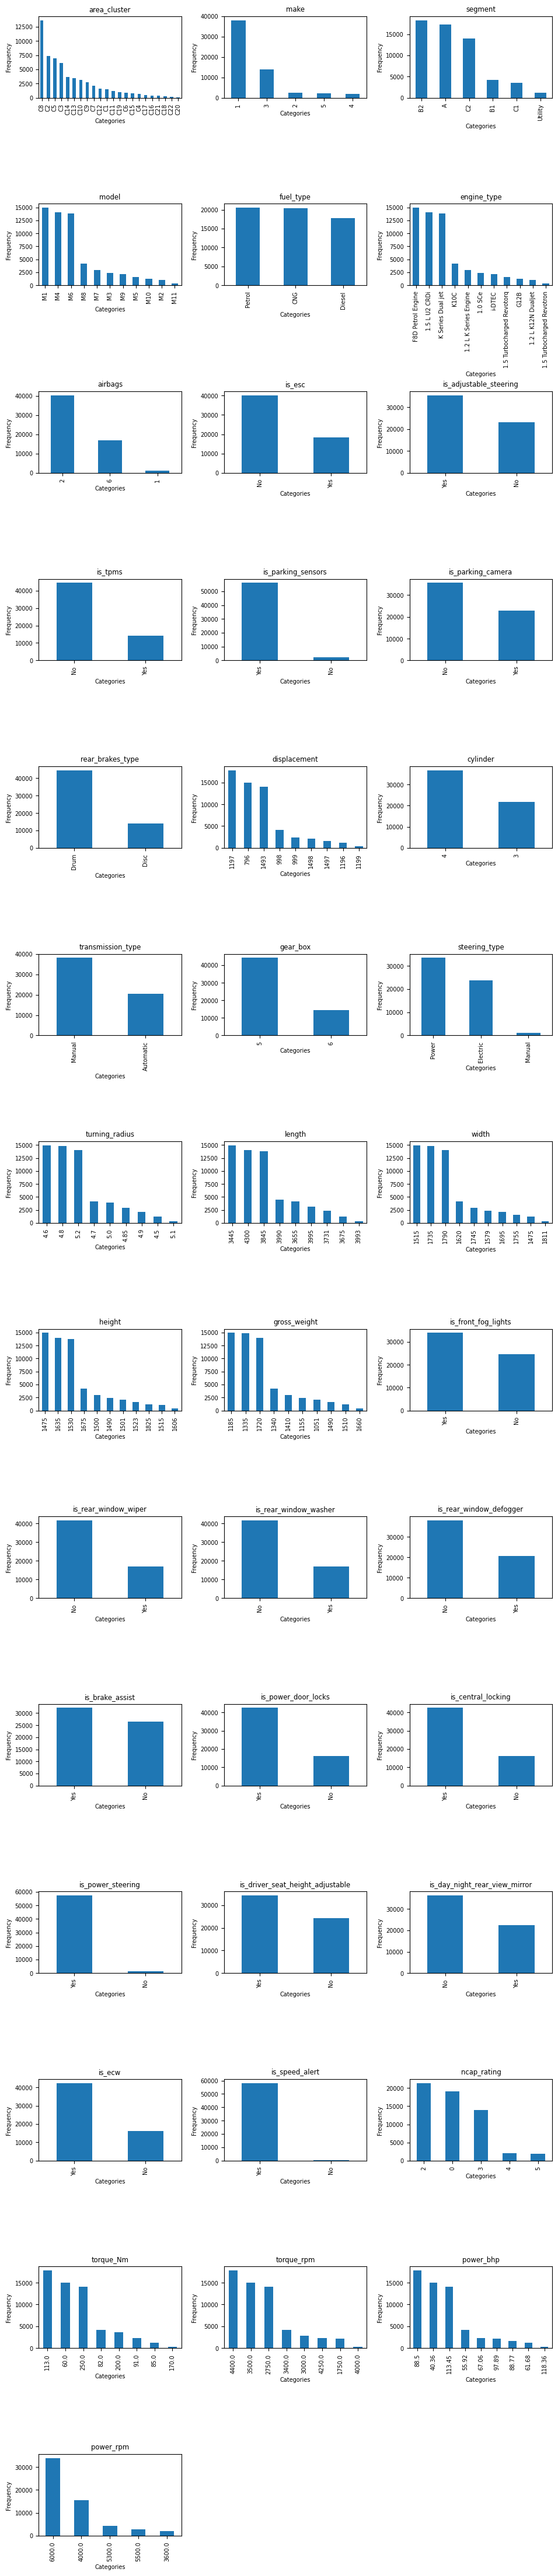

In [229]:
plt.rcParams.update({'font.size': 7})
rows = 14
columns = 3
iterator=1

for i in  cat:
    plt.subplots_adjust(left=None, bottom=1, right=1.5, top=10, wspace=0.3, hspace=1.3)
    plt.subplot(rows,columns,iterator)
    dataset[i].value_counts().plot(kind='bar')
    plt.title(i)
    plt.xlabel('Categories')
    plt.ylabel('Frequency')
    iterator+=1
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**We come to the following conclusions:**

As the distribution of the following variables looks fine to use in our model, we will **include** them:
- Segment
- Fuel_type
- Is_esc
- Is_adjustable_steering
- Is_front_fog_lights
- Is_rear_window_wiper
- Is_rear_window_washer
- Is_rear_window_defogger
- Is_brake_assist
- Is_power_door_locks
- Is_central_locking
- Is_driver_seat_height_adjustable
- Is_day_night_rear_view_mirror
- Is_ecw
- Is_tpms
- Is_parking_camera
- Rear_brakes_type
- Cylinder
- Transmission_type

These variables could be considered imbalanced. However, some categories of these variables might still be relevant to our model (this needs to be determined via transforming the data (e.g. get_dummies)). Going further, we will **provisionally include** them:
- Area_cluster
- Make
- Model
- Engine_type
- Turning_radius
- Length
- Width
- Height
- Gross_weight
- Torque and Power columns
- Gear_box
- Steering_type
- Displacement

The following variables are imbalanced and don't seem relevant for answering our business question, which is why we decided to **exclude** them going forward:
- Airbags
- Is_parking_sensors
- Is_power_steering
- Is_speed_alert
- Ncap_rating

None of our features have a large number of unique categories, but some categories occur infrequently (see above list). Those **should be transformed before using them** in our machine learning model, as the transformation might lead to better results.

#### Numerical Variables

We're generating distribution plots to visualize the shape, range, and spread of a variable's values. It provides insights into whether the data is normally distributed, skewed, or has other distribution patterns.

Analyzing the distribution of variables can guide feature engineering decisions. For example, if a variable exhibits a non-linear or skewed distribution, transforming it (e.g., **applying logarithmic or power transformations**) can help improve its suitability for certain models or capture non-linear relationships.

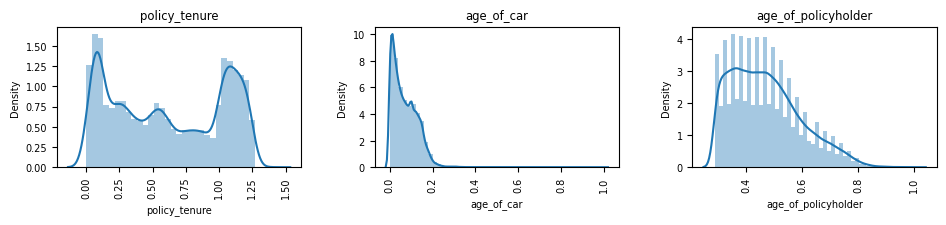

In [230]:
plt.rcParams.update({'font.size': 7})
n = ['policy_tenure', 'age_of_car', 'age_of_policyholder']

rows = 14
columns = 3
iterator=1

for i in n:
    plt.subplots_adjust(left=None, bottom=1, right=1.5, top=10, wspace=0.3, hspace=1.3)
    plt.subplot(rows,columns,iterator)
    sns.distplot(dataset[i])
    plt.title(i)
    iterator = iterator+1
    plt.xticks(rotation = 90)
    
plt.tight_layout()    
plt.show()

- Policy_tenure: The distribution of policy_tenure looks good, which makes it fine to **include** in our model.
- Age_of_car: This variable is highly skewed. As the age of a car has a high impact on our car insurance claim predictions, we need to **powertransform it first before using it** in our model.
- Age_of_policyholder: This variable is skewed as well. As the age of the policy holder has a high impact on our car insurance claim predictions, we need to **powertransform it first before using it** in our model.

In [231]:
print(dataset.age_of_car.skew())
print(dataset.age_of_policyholder.skew())

1.0940812262542075
0.6400493147434646


**The columns age_of_car and age_of_policyholder are extremely skewed. Before using them in our model, we need to transform them.**

One of the most important columns is our target variable is_claim. Let's have a deeper look at that.

#### Target variables


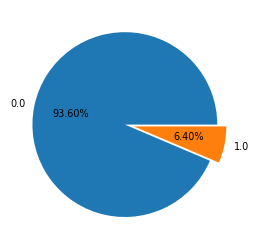

In [232]:
# Create the figure with desired size
plt.figure(figsize=(3, 3))

# Create the pie chart
plt.pie(dataset.is_claim.value_counts(), labels=dataset.is_claim.value_counts().index.tolist(), autopct='%1.2f%%', explode=[0.05]*2)

# Display the pie chart
plt.show()


**Our target variable, is_claim, is extremely imbalanced**. This unbalanced distribution can have a significant impact on the performance of models trained on our data. If we train a classifier on this dataset without accounting for the class imbalance, it **may be biased towards the majority class** and perform poorly on the minority class.Thus, we need to consider one of the following options:

- **Class weight balancing**: Assigning weights to different classes during model training can help to compensate for class imbalance. Many machine learning algorithms have an option to specify class weights, giving more importance to the minority class.
- **Oversampling**: Increase the number of instances in the minority class by randomly duplicating existing instances or generating synthetic samples. This can be done using techniques such as Random Oversampling, SMOTE (Synthetic Minority Over-sampling Technique), or ADASYN (Adaptive Synthetic Sampling).
- **Different performance metrics**: Accuracy alone may not be an appropriate evaluation metric for imbalanced classes. Consider using metrics such as precision, recall, F1-score, or area under the Receiver Operating Characteristic (ROC) curve, which provide a more comprehensive evaluation of model performance on imbalanced data.
- **Algorithm selection**: Some algorithms are more robust to imbalanced classes than others. Algorithms like Random Forests, Gradient Boosting, or Support Vector Machines tend to handle class imbalance better than simple linear models like Logistic Regression.

In [233]:
# Calculating class weight
print(f'For building our model, we should use the following class weight: {round(93.6/6.4, 0)}')

For building our model, we should use the following class weight: 15.0


### Bivariate Analysis

During our bivariate analysis we explore the relationship between our target variable is_claim and each of the variables listed in the bva list. Bivariate analysis focuses on examining the relationship between two variables, in this case, the target variable and each independent variable.

We're creating a contingency table, also known as a cross-tabulation, between the target variable is_claim and each independent variable in bva. This table provides a count of the occurrences of different combinations of the two variables. For each cross-tabulation, we're using a bar plot that represents a different category or level of the independent variable, and the height of the bar indicates the count of occurrences in each category. This visualization helps to compare the distribution of the target variable across different levels of the independent variables.

By analyzing these bivariate relationships through bar plots, you can gain insights into how each independent variable may influence the target variable, identify patterns or associations, and assess the potential predictive power of the variables for the target variable.

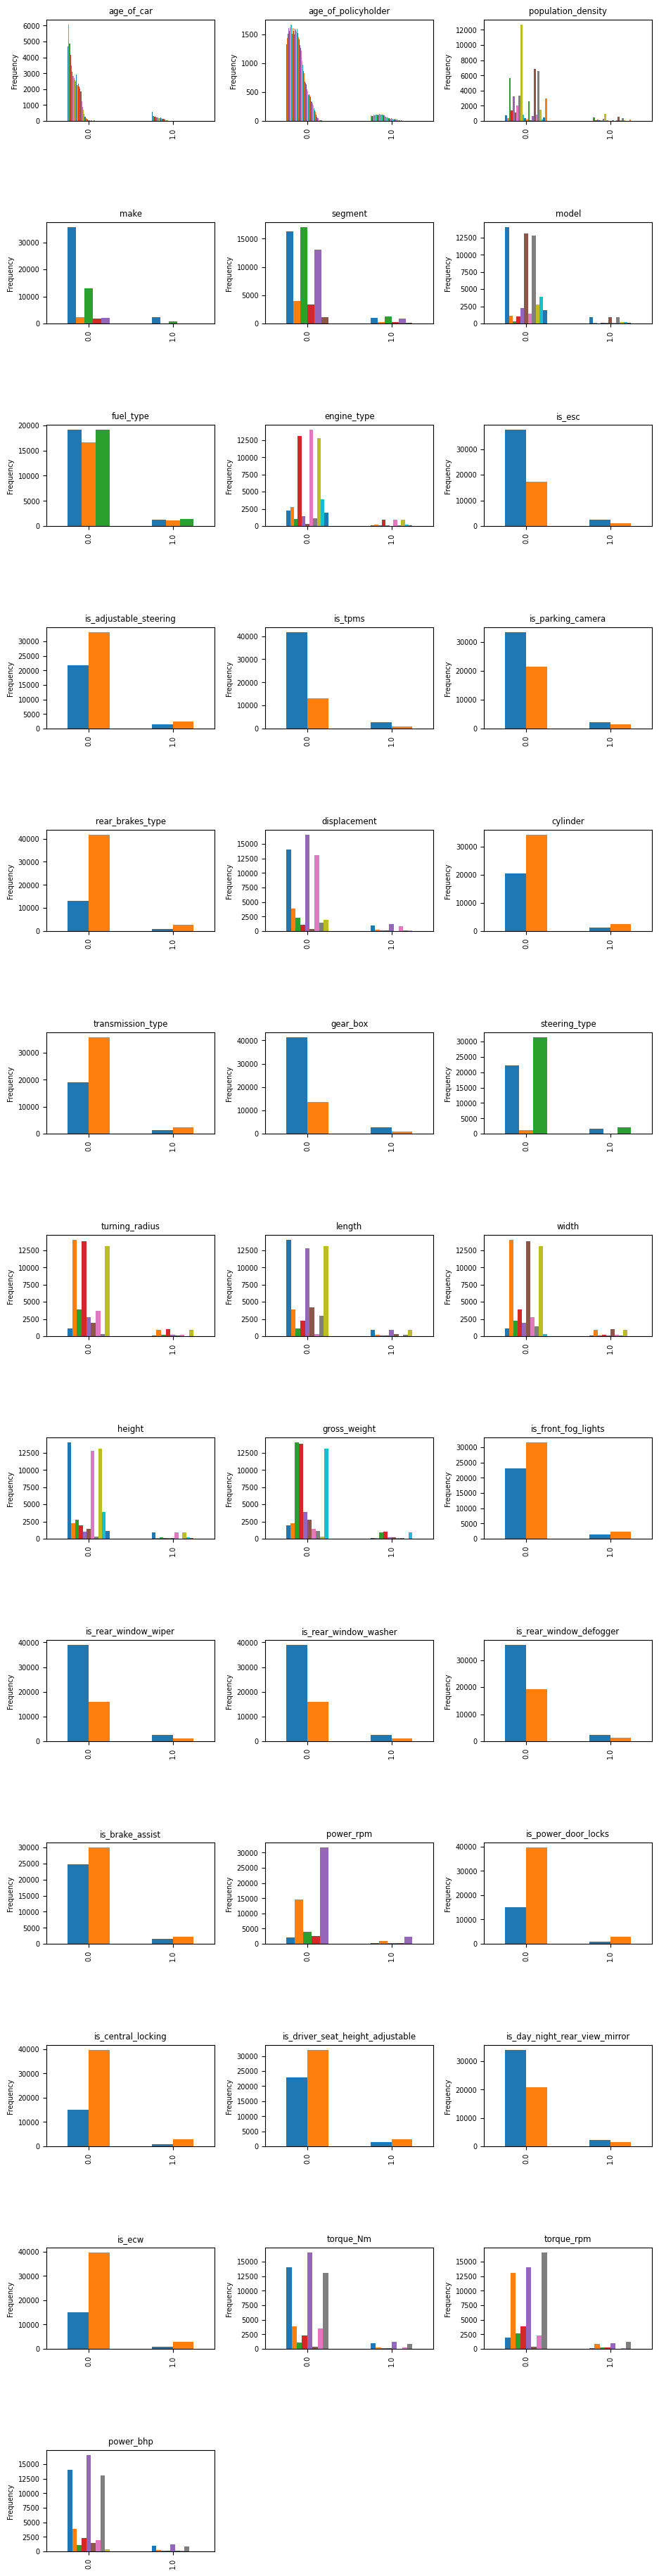

In [234]:
plt.rcParams.update({'font.size': 7})

bva = ['age_of_car', 'age_of_policyholder', 'population_density', 'make', 
       'segment', 'model', 'fuel_type', 'engine_type', 'is_esc', 'is_adjustable_steering', 
       'is_tpms', 'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder', 
       'transmission_type', 'gear_box', 'steering_type', 'turning_radius', 'length', 
       'width', 'height', 'gross_weight', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'power_rpm',
       'is_power_door_locks', 'is_central_locking', 'is_driver_seat_height_adjustable', 
       'is_day_night_rear_view_mirror', 'is_ecw', 'torque_Nm', 'torque_rpm', 'power_bhp']

num_features = len(bva)
rows = (num_features + 2) // 3  # Calculate the number of rows based on the number of features
columns = 3
iterator = 1

fig, axes = plt.subplots(rows, columns, figsize=(6.5, 4))

plt.subplots_adjust(left=None, bottom=1, right=1.45, top=10, wspace=0.3, hspace=1)

for i, feature in enumerate(bva):
    row = i // columns
    col = i % columns
    ax = axes[row, col]
    pd.crosstab(dataset.is_claim, dataset[feature]).plot(kind='bar', ax=ax, legend=False)
    ax.set_title(feature)
    ax.set_ylabel('Frequency')
    ax.set_xlabel('')  # Remove x-label for better readability
    ax.tick_params(axis='x', rotation=90)

# Remove empty subplots if there are any
if num_features < rows * columns:
    for i in range(num_features, rows * columns):
        row = i // columns
        col = i % columns
        fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()


As we dive into the bivariate analysis, it's important to **keep in mind that our target variable is highly imbalanced**, as we observed in the previous univariate analysis. This imbalance can have an impact on the relationships we explore between predictor variables and the target variable.

To ensure a more meaningful analysis, we have excluded features that were found to be highly imbalanced and deemed irrelevant for our machine learning model. By doing so, we can focus on the remaining variables that hold potential for predictive power.

Let's take a closer look at the plots above. We can observe that certain variables, such as age_of_car and age_of_policyholder (both after power transformation), fuel_type, population_density, and is_brake_assist, exhibit a **relatively balanced distribution within our imbalanced dataset**. These variables are promising candidates for inclusion in our model, as their distributions align well with our target variable.

On the other hand, some variables, like is_tpms, display a noticeable imbalance. This indicates that they may not contribute significantly to our model's performance or could introduce bias. It's crucial to consider whether these imbalanced variables should be **either excluded from the model or transformed appropriately to address the imbalance**.

By carefully assessing the balance and relevance of the variables in our bivariate analysis, we can make informed decisions about feature selection and preprocessing techniques to enhance the effectiveness of our machine learning model.

### Multivariate Analysis

The advantage of multivariate analysis is that it allows for the simultaneous examination of multiple variables, providing a more comprehensive understanding of relationships and patterns in the data. By considering multiple variables together, multivariate analysis can uncover hidden associations and dependencies that may not be apparent in univariate or bivariate analysis.

One commonly used technique in multivariate analysis is the heatmap. Heatmaps are particularly useful for visualizing the relationships between multiple variables in a tabular format. Heatmaps can display the correlation matrix, which shows the pairwise correlations between multiple variables. By using color intensity, heatmaps allow for quick and intuitive identification of strong positive or negative correlations. Furthermore, they can help identify important features or variables that are strongly correlated with the target variable. By examining the color intensity or correlation values, one can prioritize variables for further analysis or modeling.

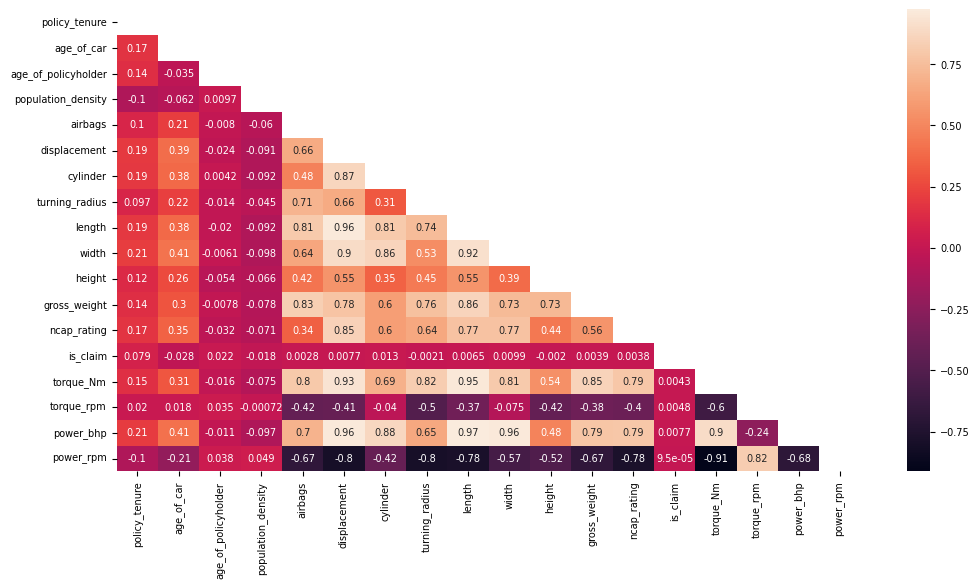

In [235]:
# transform columns to previous integer type 
dataset['airbags'] = dataset['airbags'].astype('int')
dataset['cylinder'] = dataset['cylinder'].astype('int')
#dataset['gear_box'] = dataset['gear_box'].astype('int') #leaving it out for transformation
dataset['ncap_rating'] = dataset['ncap_rating'].astype('int')
dataset['torque_Nm'] = dataset['torque_Nm'].astype('int')
dataset['torque_rpm'] = dataset['torque_rpm'].astype('int')
dataset['power_bhp'] = dataset['power_bhp'].astype('int')
dataset['power_rpm'] = dataset['power_rpm'].astype('int')
dataset['turning_radius'] = dataset['turning_radius'].astype('int')
dataset['length'] = dataset['length'].astype('int')
dataset['width'] = dataset['width'].astype('int')
dataset['height'] = dataset['height'].astype('int')
dataset['gross_weight'] = dataset['gross_weight'].astype('int')
#dataset['make'] = dataset['make'].astype('int') #leaving it out for transformation
dataset['displacement'] = dataset['displacement'].astype('int')

# correlation matrix
corr = dataset.corr()

# creating a mask to only show lower half of heatmap
mask = np.triu(np.ones_like(corr, dtype=bool))

# plotting heatmap
plt.figure(figsize = (12,6))
sns.heatmap(corr, annot = True, mask = mask);

Our target variable doesn't seem to have a high correlation between any of the other variables. This suggests that **there isn't a strong linear relationships between the target variable and the predictor variables** in our dataset (the highest variables being policy_tenure, age_of_car, and age_of_policyholder). In such cases, it is important to consider other factors and techniques for modeling and analysis. Here are two approaches we will consider:
- Nonlinear relationships!
- Ensemble methods: Ensemble methods, such as random forests or gradient boosting, are robust to low or no linear correlations between variables. These methods can capture complex interactions and non-linear relationships, allowing for accurate predictions even when linear correlations are weak.

It's important to note that correlation is just one measure of the relationship between variables, and there may be other meaningful associations or dependencies that are not captured by correlation alone. Therefore, it's crucial to approach the analysis from multiple perspectives and consider various techniques to uncover the underlying patterns and relationships in our data.

This is why we're going to try mutual information, which is a measure of the general dependence between variables. These measures can help identify features that have a strong association or information content with the target variable. By using mutual information, we can assess the dependency or information content of each feature with respect to the target variable, helping us in the feature selection process.

In [236]:
#Transforming Yes and No values into Booleans
#dataset = dataset.replace({ "No" : 0 , "Yes" : 1 })

# Set X and y values
X = dataset[['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'airbags', 'displacement', 'cylinder',
       'gear_box', 'turning_radius', 'length', 'width', 'height',
       'gross_weight', 'torque_Nm', 'torque_rpm',
       'power_bhp', 'power_rpm']]
y = dataset['is_claim']

# Compute mutual information between X and y
mutual_info = mutual_info_regression(X, y)

# Create a DataFrame to store the mutual information scores
mi_scores = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mutual_info})

# Sort the DataFrame by mutual information scores in descending order
mi_scores = mi_scores.sort_values(by='Mutual Information', ascending=False)
mi_scores[1:12]


,Feature,Mutual Information
14,torque_Nm,0.003917
12,height,0.003278
16,power_bhp,0.003234
0,policy_tenure,0.003077
13,gross_weight,0.002865
2,age_of_policyholder,0.002864
7,cylinder,0.001124
3,population_density,0.000964
8,gear_box,0.000751
15,torque_rpm,0.000380


These are the top 10 features with the highest mutual information as our target variable is_claim. Age_of_policyholder and policy_tenure are a part of the top 10 alongside 8 other variables.

#### Concluding our EDA

In this section, we will add all insights from our EDA and transform necessary columns. Lets start by adding insights from the univariate analysis:

We will drop the columns 'is_parking_sensors', 'is_power_steering', 'is_speed_alert', 'ncap_rating', and 'airbags'.
Regarding the columns 'area_cluster', 'model', 'engine_type', 'gear_box', 'steering_type' etc., which we provisionally included, we could use dummies in our feature selection to see whether all categories within each column are useful for our model.

In [237]:
# Drop unnecessary columns
dataset = dataset.drop(columns={'is_parking_sensors', 'is_power_steering', 'is_speed_alert', 'ncap_rating', 'airbags'})
dataset.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,engine_type,...,is_power_door_locks,is_central_locking,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_claim,torque_Nm,torque_rpm,power_bhp,power_rpm
0,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,F8D Petrol Engine,...,No,No,No,No,No,0.0,60,3500,40,6000
1,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,F8D Petrol Engine,...,No,No,No,No,No,0.0,60,3500,40,6000
2,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,F8D Petrol Engine,...,No,No,No,No,No,0.0,60,3500,40,6000
3,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,1.2 L K12N Dualjet,...,Yes,Yes,Yes,Yes,Yes,0.0,113,4400,88,6000
4,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,1.0 SCe,...,Yes,Yes,No,Yes,Yes,0.0,91,4250,67,5500


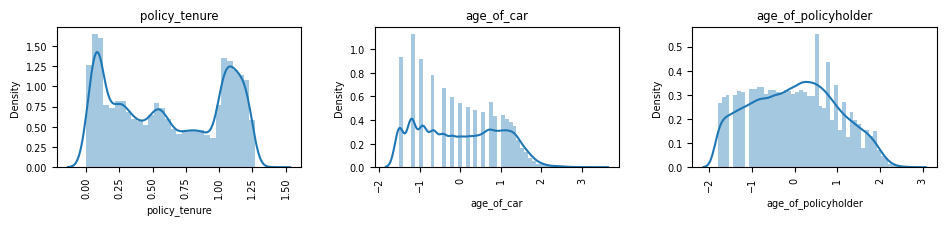

In [238]:
# Powertransform relevant columns
pt = PowerTransformer(method='yeo-johnson')
dataset.loc[:,['age_of_car','age_of_policyholder']] = pt.fit_transform(pd.DataFrame(dataset.loc[:,['age_of_car','age_of_policyholder']]))

# Plot columns
plt.rcParams.update({'font.size': 7})
n = ['policy_tenure', 'age_of_car', 'age_of_policyholder']

rows = 14
columns = 3
iterator=1

for i in n:
    plt.subplots_adjust(left=None, bottom=1, right=1.5, top=10, wspace=0.3, hspace=1.3)
    plt.subplot(rows,columns,iterator)
    sns.distplot(dataset[i])
    plt.title(i)
    iterator = iterator+1
    plt.xticks(rotation = 90)
    
plt.tight_layout()    
plt.show()

In [239]:
print(dataset.age_of_car.skew())
print(dataset.age_of_policyholder.skew())

0.12448809341883195
0.06434844532848479


Through Sklearn's PowerTransformer, we were able to preprocess the two important variables age_of_car and age_of_policyholder towards a far less skewed and imbalanced variable and can **now use them in our model**.

Now let's transform our categorical columns to see with features we should select.

In [240]:
# Transform area cluster and engine type to float without dummies
cluster_freq=dataset['area_cluster'].value_counts(normalize=True).to_dict()
dataset['area_cluster'] = dataset['area_cluster'].map(cluster_freq)

engine_freq=dataset['engine_type'].value_counts(normalize=True).to_dict()
dataset['engine_type'] = dataset['engine_type'].map(engine_freq)

In [241]:
# Get dummies for categorical 
dataset = pd.get_dummies(data = dataset, columns=['make', 'segment', 'model', 'fuel_type', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_camera',
       'rear_brakes_type', 'transmission_type', 'gear_box', 'steering_type',
       'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_driver_seat_height_adjustable',
       'is_day_night_rear_view_mirror', 'is_ecw'], drop_first=True)

dataset

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,engine_type,displacement,cylinder,turning_radius,length,...,is_front_fog_lights_Yes,is_rear_window_wiper_Yes,is_rear_window_washer_Yes,is_rear_window_defogger_Yes,is_brake_assist_Yes,is_power_door_locks_Yes,is_central_locking_Yes,is_driver_seat_height_adjustable_Yes,is_day_night_rear_view_mirror_Yes,is_ecw_Yes
0,0.515874,-0.200500,1.354890,0.025055,4990,0.255120,796,3,4,3445,...,0,0,0,0,0,0,0,0,0,0
1,0.672619,-0.923772,-0.748659,0.125307,27003,0.255120,796,3,4,3445,...,0,0,0,0,0,0,0,0,0,0
2,0.841110,-0.923772,-0.646150,0.104127,4076,0.255120,796,3,4,3445,...,0,0,0,0,0,0,0,0,0,0
3,0.900277,0.862825,-0.171140,0.011350,21622,0.018433,1197,4,4,3995,...,1,0,0,1,1,1,1,1,1,1
4,0.596403,0.862825,1.300866,0.119112,34738,0.040500,999,3,5,3731,...,0,0,0,0,0,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,0.355089,1.132040,1.354890,0.233035,8794,0.040500,999,3,5,3731,...,0,0,0,0,0,1,1,0,1,1
58588,1.199642,-0.923772,0.548946,0.062466,7788,0.255120,796,3,4,3445,...,0,0,0,0,0,0,0,0,0,0
58589,1.162273,-0.200500,0.002782,0.119112,34738,0.255120,796,3,4,3445,...,0,0,0,0,0,0,0,0,0,0
58590,1.236307,1.254005,0.822720,0.233035,8794,0.235117,1197,4,4,3845,...,1,0,0,0,1,1,1,1,1,1


As we have seen in our EDA, we have a clear minority class. When the class distribution is imbalanced, meaning one class is significantly underrepresented compared to the other(s), the learning algorithm may have difficulty properly recognizing and predicting the minority class. 

In such cases, oversampling techniques like SMOTE can help address the class imbalance by generating synthetic samples for the minority class. SMOTE works by creating synthetic examples along the line segments connecting neighboring instances of the minority class. This helps to increase the number of minority class samples in the training set, providing more representative and balanced data for the learning algorithm.

When using oversampling techniques like SMOTE, it's generally recommended to perform the oversampling only on the training set, and not on the entire dataset including the test set. The reason for this is to ensure that the test set remains an unbiased representation of real-world data. If we oversample the minority class in the entire dataset, it can introduce synthetic samples that are very similar to existing minority class samples, potentially causing information leakage from the training set to the test set. This can lead to overly optimistic performance estimates and inaccurate evaluation of our model's generalization ability.

Therefore, on order to account for our imbalance, **we're using the oversampling technique SMOTE only on our train set**.

In [242]:
from sklearn.model_selection import train_test_split

# Create X and y 
x = dataset.drop('is_claim',axis=1)
y = dataset['is_claim']

# Split data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state = 42)

In [243]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state = 42, sampling_strategy = 0.30)

x_train, y_train =  smt.fit_resample(x_train, y_train)

x_train.shape, y_train.shape

((57045, 57), (57045,))

SMOTE (Synthetic Minority Over-sampling Technique) can be a suitable choice for oversampling when dealing with imbalanced datasets under certain characteristics:

- Relatively small dataset: If you have a limited amount of data, applying SMOTE can help increase the number of samples in the minority class, providing a more balanced training set and potentially improving model performance.

- Continuous or numerical data: SMOTE works well with continuous or numerical features. It creates synthetic examples by interpolating between existing minority class samples, which is easier to achieve in a continuous feature space.

- Noisy data or outliers: SMOTE can be effective in handling noisy data or outliers within the minority class. By generating synthetic samples, SMOTE can help fill in gaps or areas where the minority class might be sparsely represented.

As these characteristics are given, we are of the opinion that **SMOTE is the best oversampling method in our specific situation.**

Now let's use our prepared and processed dataset to find the best features to use.


## Feature Selection

When dealing with datasets that contain numerous features, it becomes **crucial to select the most relevant and informative variables** for the machine learning model. Feature selection plays a vital role in improving model performance, reducing overfitting, and enhancing interpretability. Too solve our business question, we will explore a practical approach to feature selection by **employing the logistic regression algorithm**, a versatile and widely used method in the field of classification. By utilizing logistic regression as a feature selector, we can identify the most informative variables and construct a more interpretable and accurate model. This approach not only enhances prediction performance but also provides valuable insights into the underlying relationships between the features and the target variable.

In [244]:
# Compute mutual information between X and y
mutual_info = mutual_info_regression(x_train, y_train)

# Create a DataFrame to store the mutual information scores
mi_scores = pd.DataFrame({'Feature': x_train.columns, 'Mutual Information': mutual_info})

# Sort the DataFrame by mutual information scores in descending order
mi_scores = mi_scores.sort_values(by='Mutual Information', ascending=False)
mi_scores.head(20)

,Feature,Mutual Information
2,age_of_policyholder,0.298664
1,age_of_car,0.245658
0,policy_tenure,0.025690
14,torque_rpm,0.016219
12,gross_weight,0.014151
3,area_cluster,0.011708
11,height,0.010662
6,displacement,0.010454
5,engine_type,0.008192
4,population_density,0.006327
